In [90]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

In [91]:
(X_Train,_),(_,_) = mnist.load_data()

In [92]:
print(X_Train.shape)

(60000, 28, 28)


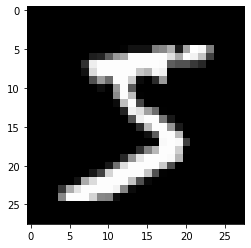

In [93]:
plt.imshow(X_Train[0],cmap='gray')
plt.show()

In [94]:
X_Train = (X_Train.astype('float32') - 127.5)/127.5
print(np.min(X_Train))
print(np.max(X_Train))
print(X_Train.shape)

-1.0
1.0
(60000, 28, 28)


In [95]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE)
HALF_BATCH = 128
NOISE_DIM = 100
adam = Adam(lr=2e-4,beta_1=0.5)

In [96]:
# Generator network

generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 784)             

In [97]:
# Discriminator

discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Freezing the discriminator
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

# Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer = adam)

In [99]:
X_Train = X_Train.reshape(-1,784)
print(X_Train.shape)

(60000, 784)


In [100]:
def save_images(epoch,samples=100):
    noise = np.random.normal(0,1,size = (samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()
        

Epoch 1 Disc Loss 0.6413 Generator Loss 0.9284
Epoch 2 Disc Loss 0.6421 Generator Loss 1.0345
Epoch 3 Disc Loss 0.6450 Generator Loss 1.0614
Epoch 4 Disc Loss 0.6083 Generator Loss 1.2089
Epoch 5 Disc Loss 0.5937 Generator Loss 1.2539


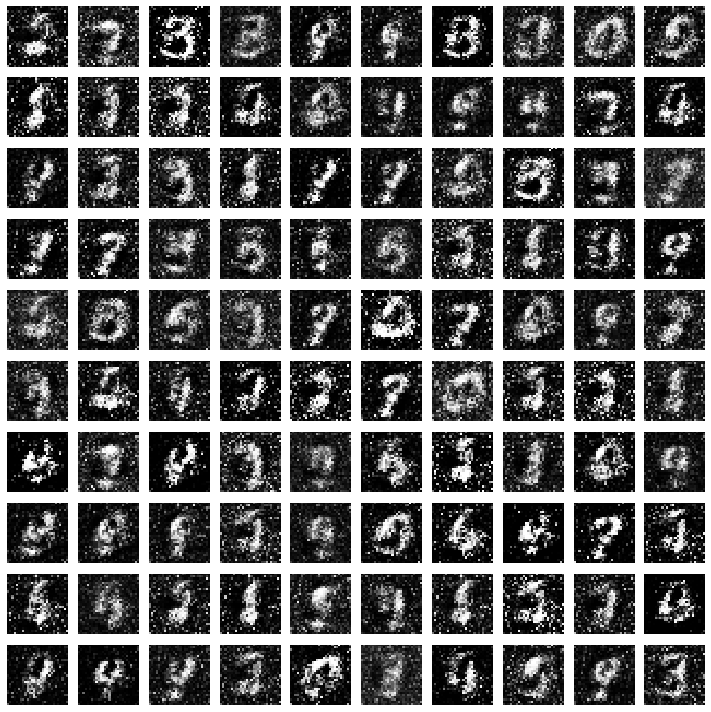

Epoch 6 Disc Loss 0.5706 Generator Loss 1.3065
Epoch 7 Disc Loss 0.5727 Generator Loss 1.2650
Epoch 8 Disc Loss 0.5804 Generator Loss 1.2435
Epoch 9 Disc Loss 0.5910 Generator Loss 1.2358
Epoch 10 Disc Loss 0.6169 Generator Loss 1.1305


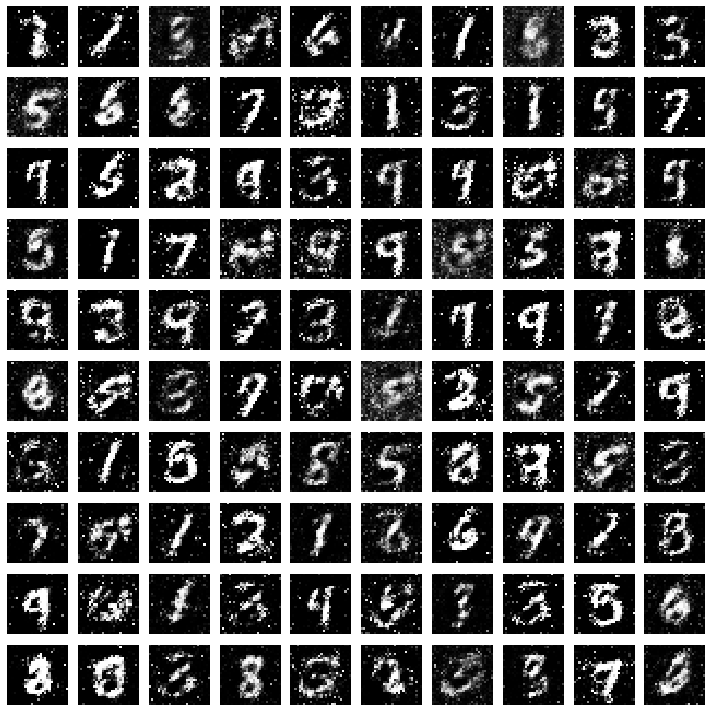

Epoch 11 Disc Loss 0.6292 Generator Loss 1.0828
Epoch 12 Disc Loss 0.6277 Generator Loss 1.0716
Epoch 13 Disc Loss 0.6256 Generator Loss 1.0884
Epoch 14 Disc Loss 0.6311 Generator Loss 1.0650
Epoch 15 Disc Loss 0.6365 Generator Loss 1.0466


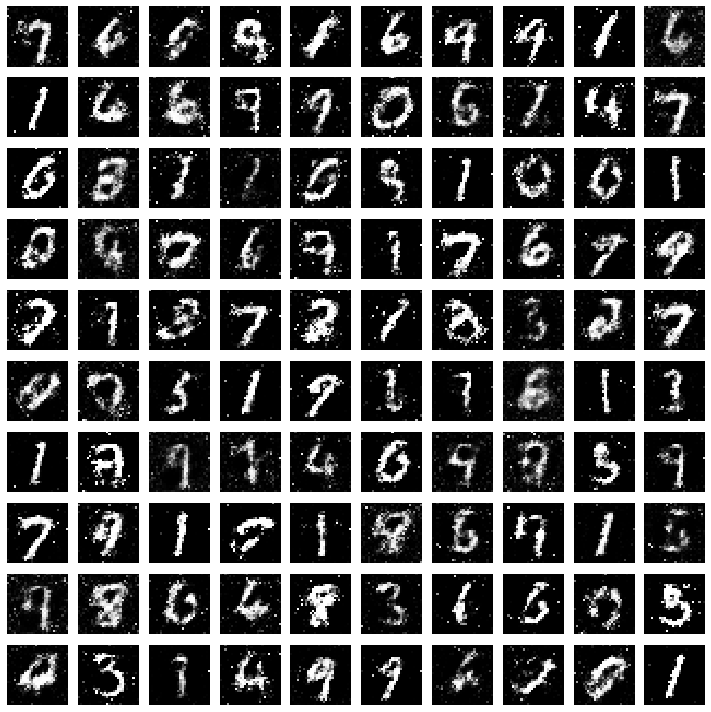

Epoch 16 Disc Loss 0.6425 Generator Loss 1.0314
Epoch 17 Disc Loss 0.6403 Generator Loss 1.0385
Epoch 18 Disc Loss 0.6448 Generator Loss 1.0210
Epoch 19 Disc Loss 0.6493 Generator Loss 1.0088
Epoch 20 Disc Loss 0.6510 Generator Loss 1.0055


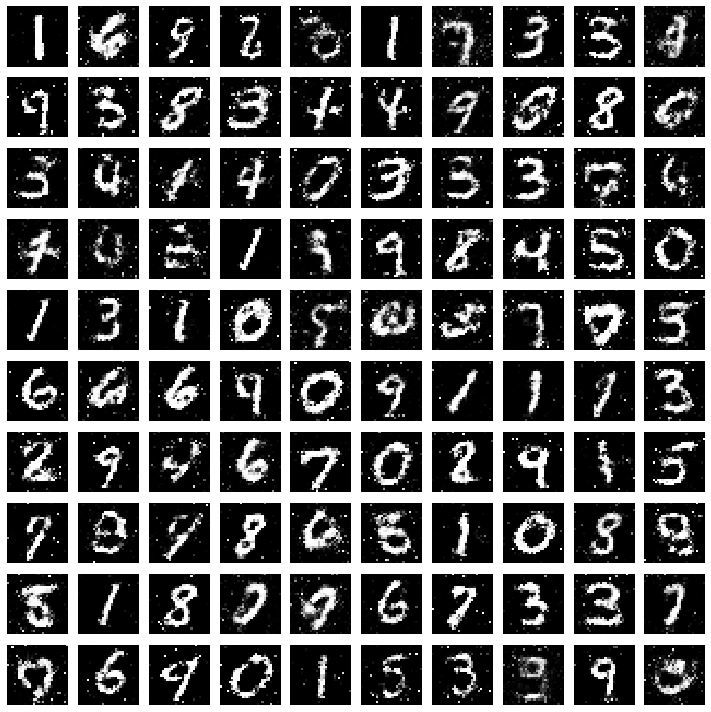

Epoch 21 Disc Loss 0.6530 Generator Loss 0.9998
Epoch 22 Disc Loss 0.6539 Generator Loss 0.9995
Epoch 23 Disc Loss 0.6560 Generator Loss 1.0024
Epoch 24 Disc Loss 0.6543 Generator Loss 1.0007
Epoch 25 Disc Loss 0.6575 Generator Loss 0.9967


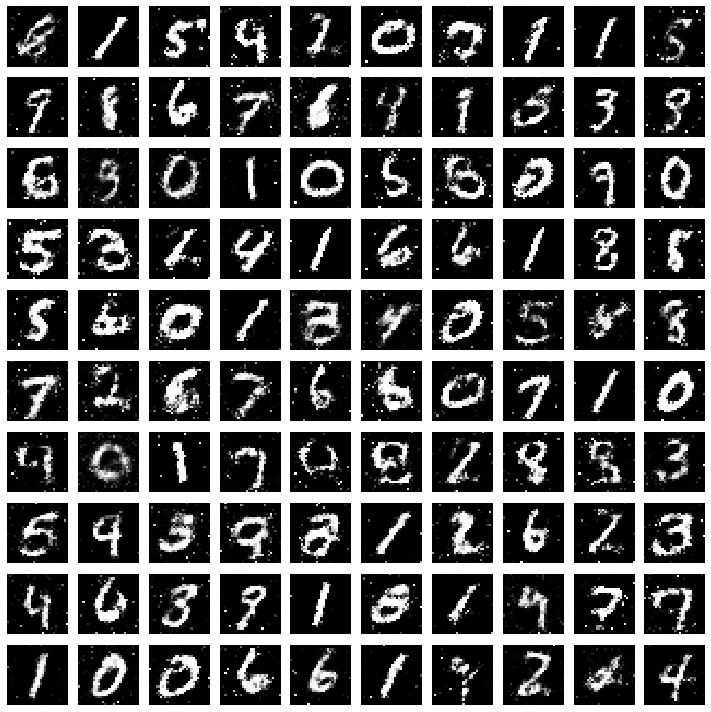

Epoch 26 Disc Loss 0.6574 Generator Loss 0.9959
Epoch 27 Disc Loss 0.6582 Generator Loss 1.0010
Epoch 28 Disc Loss 0.6587 Generator Loss 0.9992
Epoch 29 Disc Loss 0.6581 Generator Loss 0.9984
Epoch 30 Disc Loss 0.6587 Generator Loss 0.9951


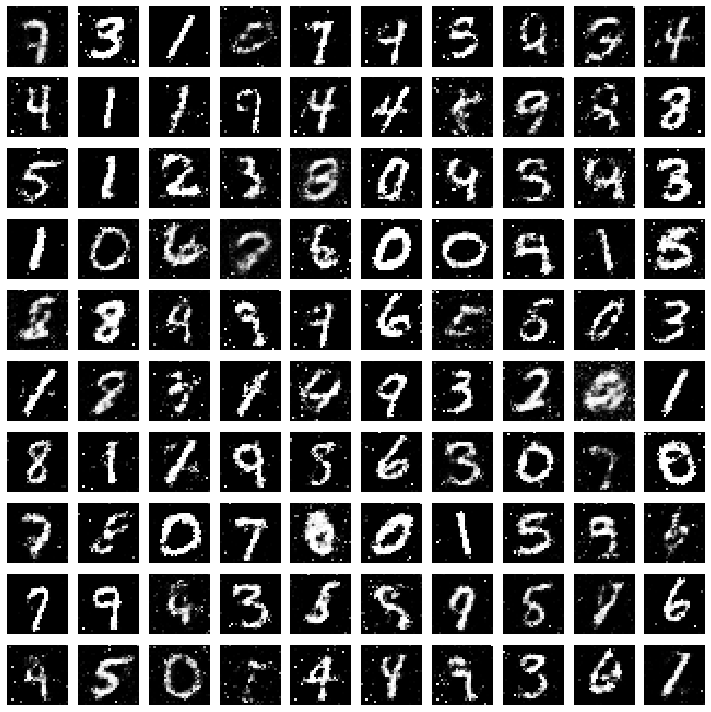

Epoch 31 Disc Loss 0.6590 Generator Loss 0.9925
Epoch 32 Disc Loss 0.6611 Generator Loss 0.9979
Epoch 33 Disc Loss 0.6598 Generator Loss 0.9938
Epoch 34 Disc Loss 0.6618 Generator Loss 0.9934
Epoch 35 Disc Loss 0.6612 Generator Loss 0.9874


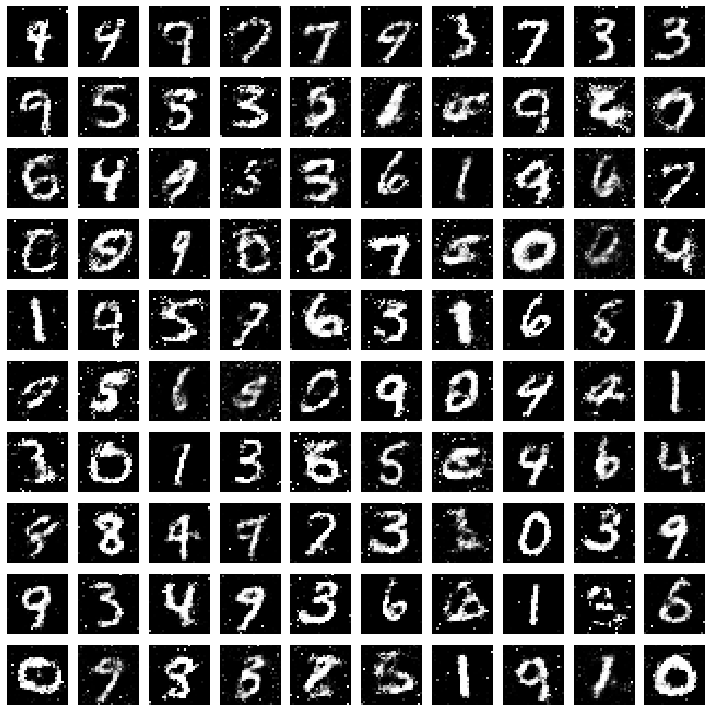

Epoch 36 Disc Loss 0.6616 Generator Loss 0.9884
Epoch 37 Disc Loss 0.6609 Generator Loss 0.9918
Epoch 38 Disc Loss 0.6618 Generator Loss 0.9849
Epoch 39 Disc Loss 0.6613 Generator Loss 0.9931
Epoch 40 Disc Loss 0.6623 Generator Loss 0.9892


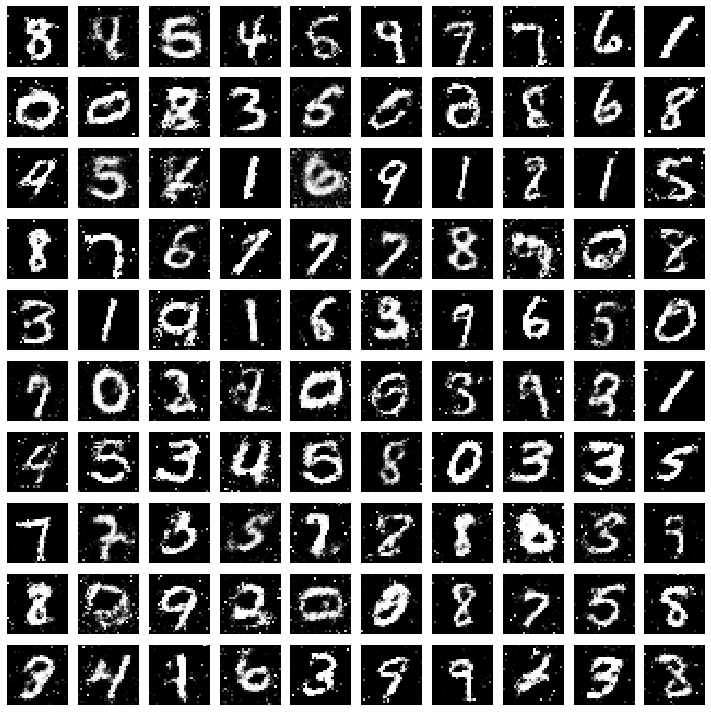

Epoch 41 Disc Loss 0.6640 Generator Loss 0.9871
Epoch 42 Disc Loss 0.6635 Generator Loss 0.9863
Epoch 43 Disc Loss 0.6626 Generator Loss 0.9868
Epoch 44 Disc Loss 0.6631 Generator Loss 0.9893
Epoch 45 Disc Loss 0.6639 Generator Loss 0.9823


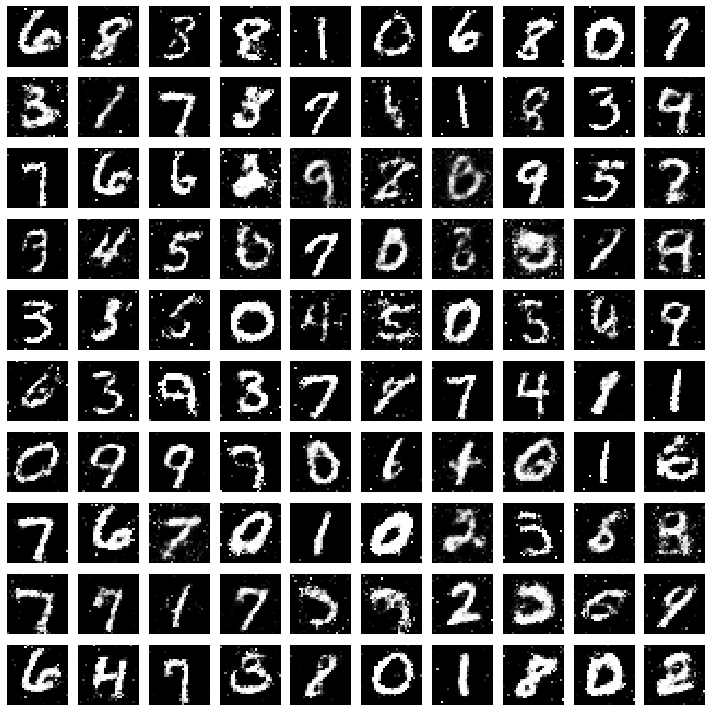

Epoch 46 Disc Loss 0.6636 Generator Loss 0.9866
Epoch 47 Disc Loss 0.6644 Generator Loss 0.9855
Epoch 48 Disc Loss 0.6641 Generator Loss 0.9900
Epoch 49 Disc Loss 0.6653 Generator Loss 0.9855
Epoch 50 Disc Loss 0.6632 Generator Loss 0.9848


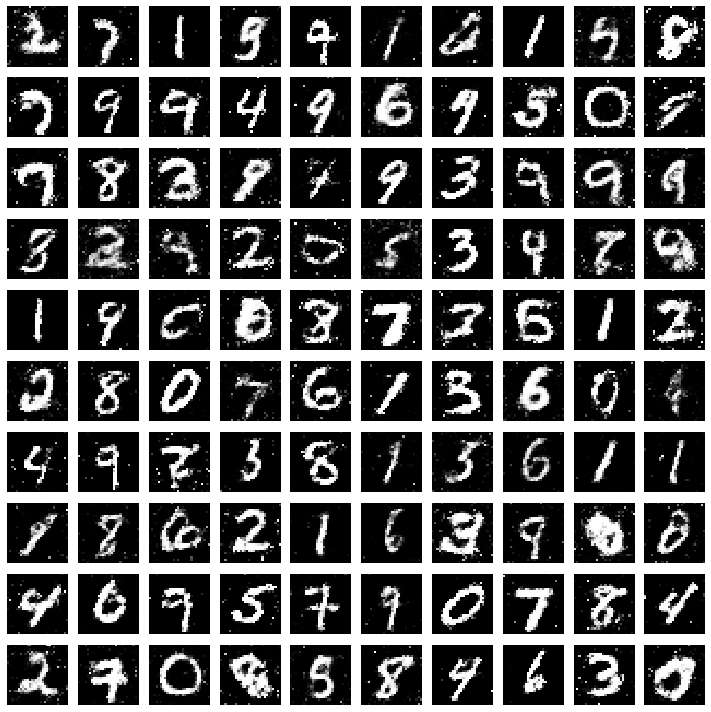

In [101]:
# Traning the GAN
d_losses = []
g_losses = []

for epoch in range(TOTAL_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    # mini batch SGD
    for step in range(NO_OF_BATCHES):
        
        # Step-1 : Training the Discriminator provided Generator is frozen.
        # Use 50% real data & 50% fake data for discriminator
        
        # Real Data X
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH)
        real_imgs = X_Train[idx]
        
        # Fake Data X
        noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        # Labels for real and fake data
        real_y = np.ones((HALF_BATCH,1))*0.9 # One sided label smoothening
        fake_y = np.zeros((HALF_BATCH,1))
        
        # Training the discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        epoch_d_loss += d_loss
        
        
        # Step-2: Training the Generator provided Discriminator is frozen.
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,ground_truth_y)
        epoch_g_loss += g_loss

    
    print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
    
    if (epoch+1)%5==0:
        generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
        save_images(epoch)

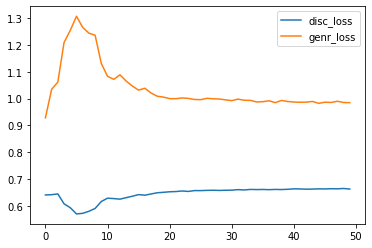

In [102]:
plt.plot(d_losses,label='disc_loss')
plt.plot(g_losses,label='genr_loss')
plt.legend()
plt.show()